## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
merged_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = len(merged_mouse_df["Mouse ID"].unique())
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice=merged_mouse_df.loc[merged_mouse_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

duplicate_mice = merged_mouse_df[merged_mouse_df.duplicated(subset=['Mouse ID',"Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.I 

new_mouse_df = merged_mouse_df[merged_mouse_df["Mouse ID"] != "g989"]
new_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_number_mice = len(new_mouse_df["Mouse ID"].unique())
new_number_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = new_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_median = new_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_var = new_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_std = new_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_sem = new_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_summary_df = pd.DataFrame(data=
        {"Tumor Vol Mean":drug_mean, 
        "Tumor Vol Median":drug_median,
        "Tumor Vol Variance":drug_var,
        "Tumor Vol Standard Deviation":drug_std,
        "Tumor Vol SEM":drug_sem})
drug_summary_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = new_mouse_df.groupby(["Drug Regimen"])

drug_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

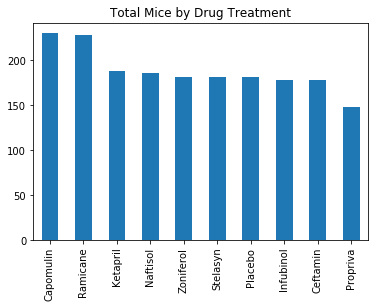

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_count = new_mouse_df["Drug Regimen"].value_counts()

mice_bar_pandas = mouse_count.plot(kind = "bar", x="Drug Regimen", y="Total Mice", title = "Total Mice by Drug Treatment")

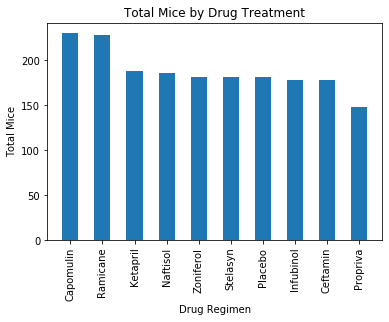

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_mice = new_mouse_df['Drug Regimen'].value_counts()

plt.bar(drug_mice.index.values, drug_mice.values, width = .5)

plt.title("Total Mice by Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.xticks(rotation ="vertical")
plt.show()

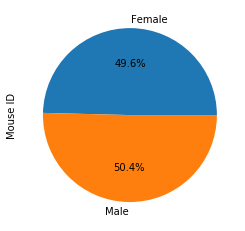

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = new_mouse_df.groupby('Sex')
total_gender = gender_group["Mouse ID"].nunique()
mice_pie_pandas = total_gender.plot.pie(y='gender_group', autopct='%1.1f%%')

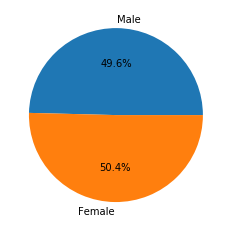

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']
plt.pie(total_gender, autopct='%1.1f%%', labels=labels) 
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = new_mouse_df.groupby("Mouse ID")["Timepoint"].max()
final_tumor_vol = final_tumor_vol.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_merged = final_tumor_vol.merge(new_mouse_df, on=['Mouse ID','Timepoint'], how="left")

tumor_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment_list:
   

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_final = tumor_merged.loc[tumor_merged['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_list.append(tumor_vol_final)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    median = quartiles[0.5]
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_final.loc[(tumor_vol_final < lower_bound) | (tumor_vol_final > upper_bound)]

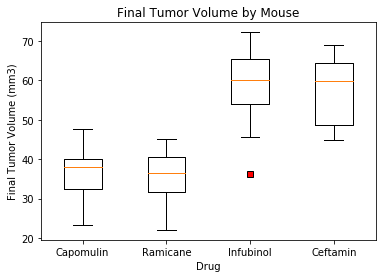

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops = red_square)
plt.title('Final Tumor Volume by Mouse')
plt.xlabel('Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

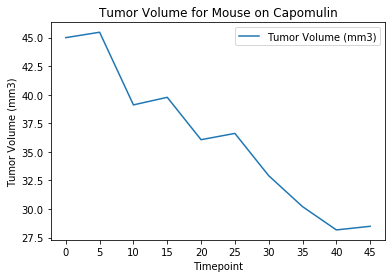

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

drug_capomulin = new_mouse_df.loc[new_mouse_df['Drug Regimen'] == 'Capomulin'].reset_index(drop=True)
capomulin_mouse = drug_capomulin.loc[drug_capomulin['Mouse ID'] == drug_capomulin['Mouse ID'][12]]

plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], label = 'Tumor Volume (mm3)')
plt.xticks(capomulin_mouse['Timepoint'])
plt.title('Tumor Volume for Mouse on Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.show()

([<matplotlib.axis.XTick at 0x7fe84b901050>,
 <a list of 25 Text xticklabel objects>)

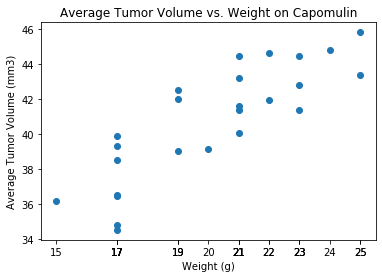

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_group = drug_capomulin.groupby('Mouse ID')
avg_weight = capomulin_group['Weight (g)'].mean()
avg_vol = capomulin_group['Tumor Volume (mm3)'].mean()


plt.scatter(avg_weight, avg_vol)
plt.title('Average Tumor Volume vs. Weight on Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xticks(avg_weight.values)

## Correlation and Regression

The correlation between both factors is 0.84


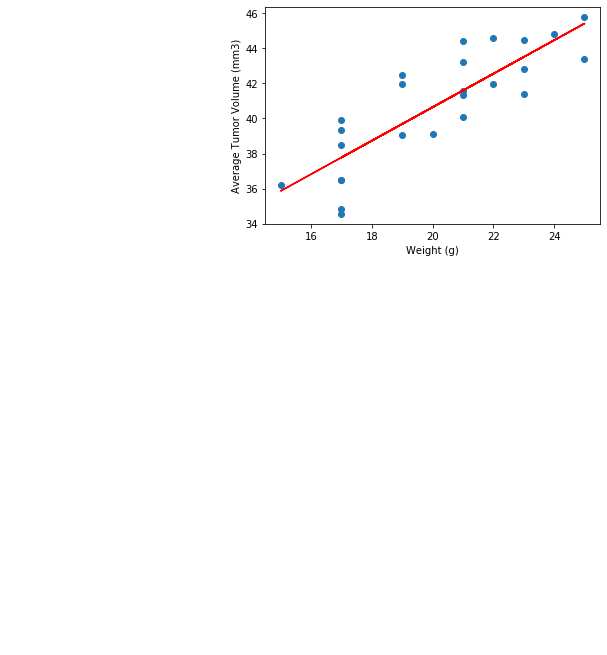

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


correlation = st.pearsonr(avg_weight,avg_vol)
plt.scatter(avg_weight,avg_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_vol)
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(avg_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()